## Implement Multi Layer Perceptron with Backpropagation As A Binary Classifier


Audity Ghosh
<br>CSE, RUET

#### Objectives:
- Implement Multi-layer Perceptron with Python
- How Backpropagation works?
- Comparison using accuracy by splitting in train and test 


#### References:
[1] Backpropagation Formula List added below 


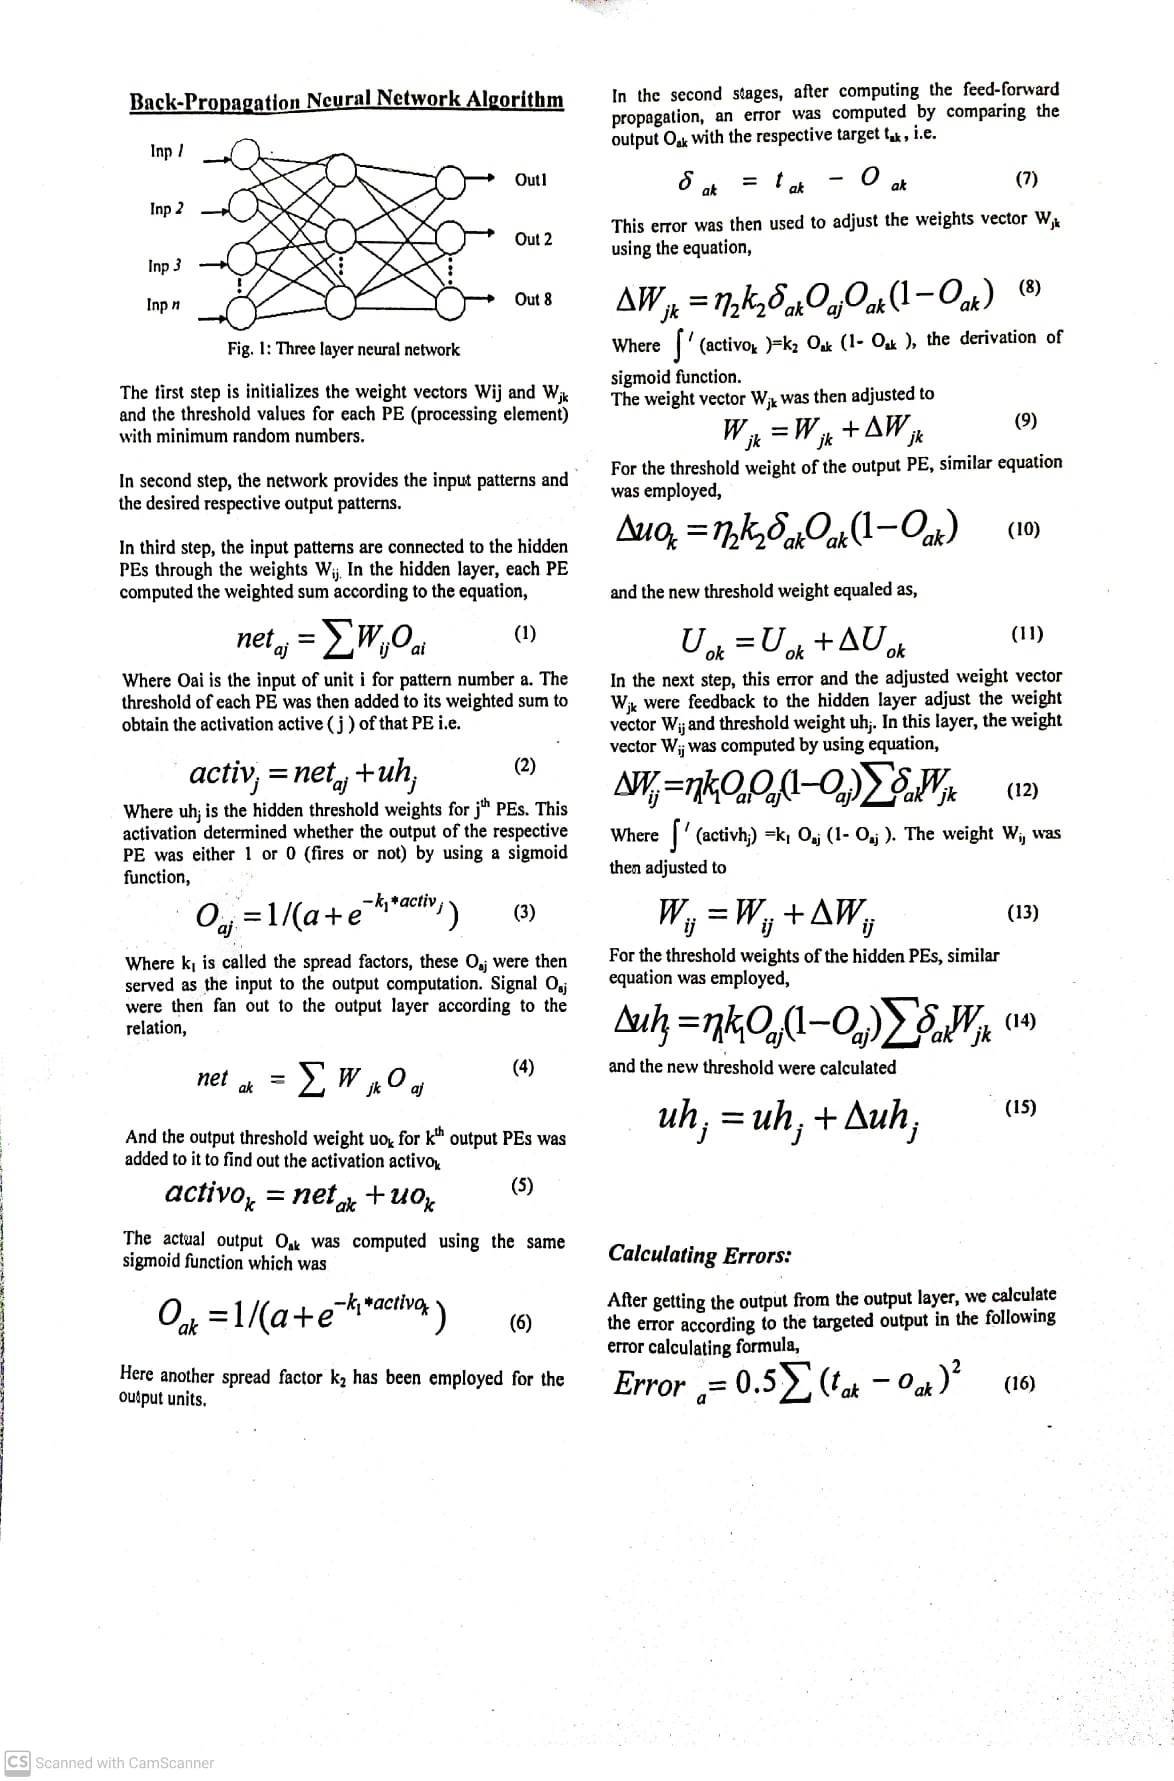

### import necessary libraries

In [226]:
import numpy as np
import pandas as pd
import math
import time

### data processing

In [227]:
no_bit = 5 # no of nodes in input layer( no of features )

In [228]:
# make data with n bits

import itertools


ds = []
word = '0'*no_bit
ds.append(word)

[
    ds.append(num)
    for num in (''.join(p) for p in itertools.product('01', repeat=no_bit)) 
    if not num.startswith(word)
]

print("The dataset is created with",no_bit,"bits are of length",len(ds))
print(ds)

The dataset is created with 5 bits are of length 32
['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']


In [229]:
# insert desired output for each sample

data = []
for string in ds:
    l = []
    for char in string:
        l.append(int(char))
    if(l[0]==0):
        l.append(0)
    else:
        l.append(1)
    data.append(l)

In [230]:
# add column names for each feature

col = []
for i in range(len(data[0])-1):
    col.append("X"+str(i+1))
col.append("Output")
col

['X1', 'X2', 'X3', 'X4', 'X5', 'Output']

### final dataset

In [231]:
data

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 0],
 [0, 1, 1, 0, 1, 0],
 [0, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 1, 1],
 [1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 1],
 [1, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 1],
 [1, 1, 0, 0, 0, 1],
 [1, 1, 0, 0, 1, 1],
 [1, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 1],
 [1, 1, 1, 0, 0, 1],
 [1, 1, 1, 0, 1, 1],
 [1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1]]

In [232]:
df = pd.DataFrame(data, columns=col)
df

,X1,X2,X3,X4,X5,Output
0,0,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,1,1,0
4,0,0,1,0,0,0
5,0,0,1,0,1,0
6,0,0,1,1,0,0
7,0,0,1,1,1,0
8,0,1,0,0,0,0
9,0,1,0,0,1,0


In [233]:
df['Output'].value_counts()

0    16
1    16
Name: Output, dtype: int64

In [234]:
# set no of hidden layers ( this code works for one layer )
no_of_hidden_layer = 1 

# no of nodes in a single hidden layer 
no_of_nodes_hidden_layer = 2

In [235]:
# as it is a binary classifier , no of classes will be 2

no_of_classes = len(set(df['Output']))
no_of_classes

2

In [236]:
#k1,k2,eta1,eta2 =np.random.rand(4)

In [237]:
# initlializing spread rates and learning rates 
k1,k2,eta1,eta2 =1,1,1,1

In [238]:
k1,k2,eta1,eta2

(1, 1, 1, 1)

In [239]:
# find no of nodes in output layer from the no of classes ( binary classifier, node = 1)

no_of_nodes_output_layer =  int(math.log2(no_of_classes))

if((math.ceil(math.log2(no_of_classes)) != math.floor(math.log2(no_of_classes)))):
    no_of_nodes_output_layer+=1

print(no_of_nodes_output_layer)
    
    


1


# i = input layer 
# j = hidden layer
# k = output layer

# Step 1 - Initialize weights and thresholds

In [240]:
def initialize_weight_thresh():
    
    
    #weights of input to hidden Wij ( size will be input nodes * hidden layer nodes )
    Wij = [ list(np.random.rand(no_of_nodes_hidden_layer)) for i in range(len(data[0])-1)]
    
    
    
    # threshold of hidden layer's nodes ( size will be no of hidden layer nodes )
    Uhj = list(np.random.rand(no_of_nodes_hidden_layer))
    
    
    
    #weights of hidden to output Wjk ( size will be no of nodes in hidden layer * no of nodes in output layer )
    Wjk = [ list(np.random.rand(no_of_nodes_output_layer)) for i in range(no_of_nodes_hidden_layer)]
    
    
    
    # threshold of output layer's nodes ( here binary classifier so size 1)
    Uok = list(np.random.rand(no_of_nodes_output_layer))
    
    
    
    #print("F",Wij,Uhj,Wjk,Uok)
    
    return Wij,Uhj,Wjk,Uok

In [241]:
#weights of input to hidden Wij
Wij = [ list(np.random.rand(no_of_nodes_hidden_layer)) for i in range(len(data[0])-1)]

Wij

[[0.5786847630392853, 0.8081518333735703],
 [0.21312089767742393, 0.7384144383439747],
 [0.07959430228357212, 0.2882083193746803],
 [0.17493076281804676, 0.7324916540617273],
 [0.8168990360858285, 0.7757879639358756]]

In [242]:
# threshold of hidden layer's nodes
Uhj = list(np.random.rand(no_of_nodes_hidden_layer))
Uhj

[0.9100705578278472, 0.8728237704700884]

In [243]:
#weights of hidden to output Wjk
Wjk = [ list(np.random.rand(no_of_nodes_output_layer)) for i in range(no_of_nodes_hidden_layer)]

Wjk

[[0.27573231860128966], [0.6745478880331849]]

In [244]:
# threshold of output layer's nodes
Uok = list(np.random.rand(no_of_nodes_output_layer))
Uok

[0.4216372025574181]

In [245]:
# initializing output from input, hidden and output layers, with error 

Oi,Oj,Ok,sigmak = 0,0,0,0

# Step 2 - Present Input and Desired Output

In [246]:
df

,X1,X2,X3,X4,X5,Output
0,0,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,1,1,0
4,0,0,1,0,0,0
5,0,0,1,0,1,0
6,0,0,1,1,0,0
7,0,0,1,1,1,0
8,0,1,0,0,0,0
9,0,1,0,0,1,0


In [247]:
# sigmoid function 1/1+e^(-k*active)


def sigmoid(k,activ):
    return 1/(1+math.exp(-k*activ))

    
    

# Step 3 

## Equation 1 , 2, 3 ( hidden layer )

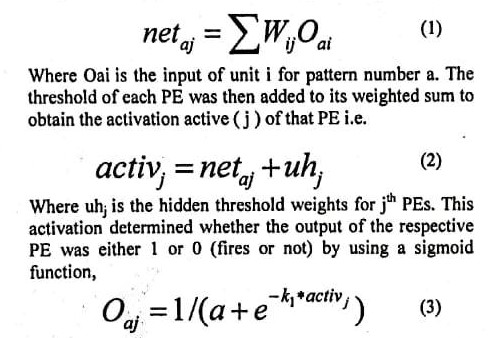

In [248]:
# netj = sum(wij,oi)
# activej = netj + uhj
#Oj = 1/(1+exp(-k1*activj))

def compute_output_hidden(row): # parameter is pattern ( each row )
    
    netj = [] # net sum of products of input features and corresponding weights
    Oj = []   # output from each hidden layer node
    activj = [] # activation from each hidden layer node ( before sigmoid )
    
    for j in range(no_of_nodes_hidden_layer): # as we are concerned with no of hidden layers outputs 
        
        net = 0.0
        for i in range(len(row)-1):
            net += Wij[i][j] * row[i]    # equation 1 completion ( sum of products for each hidden layer node )
        
        
        active = net + Uhj[j]            # equation 2 completion ( adding threshold )
        
        output = sigmoid(k1,active)      # equation 3 completion ( after sigmoid, each hidden layer node output )
        
        
        netj.append(net) 
        activj.append(active)
        Oj.append(output)
        
    #print(netj,activj,Oj)
        
    return Oj # final output from all hidden layer nodes 
        
    
    
    #print(list(netj),list(activj))
    
    
    
    

'''            
netj,activj = compute_active_hidden([0,0,1,0])
print(netj)
print(activj)'''

Oj = compute_output_hidden([0,0,1,0])
Oj

[0.7290217208641097, 0.7615202003620953]

## Equation 4,5,6 (Output Layer)

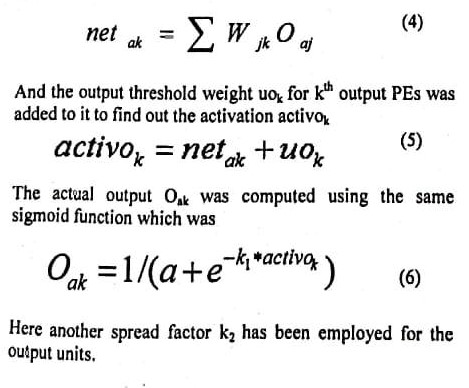

In [249]:
# netk = sum(wjk,oj)
# activek = netk + uok
#Ok = 1/(1+exp(-k2*activk))

def compute_output_output(Oj):  # parameter is pattern ( each row )
    
    netk = [] # net sum of products of output from hidden layer nodes and corresponding weights
    Ok = [] # output from each output layer node
    activk = [] # activation from each output layer node ( before sigmoid )
    
    
    for k in range(no_of_nodes_output_layer): # as we are concerned with no of output layers outputs 
        
        net = 0.0
        for j in range(no_of_nodes_hidden_layer):
            net += Wjk[j][k] * Oj[j]   # equation 4 completion ( sum of products for each output layer node )
        
        
        
        
        active = net + Uok[k]          # equation 5 completion ( adding threshold )
        
        output = sigmoid(k2,active)    # equation 6 completion ( after sigmoid, each output layer node output )
        
        
        netk.append(net) 
        activk.append(active)
        Ok.append(output)
        
    #print(netk,activk,Ok)
        
    return Ok   # final output from all output layer nodes 
        
    
    
    
Ok = compute_output_output([0,1,1,1])
Ok

[0.7495446242622513]

### Equation 7 ( compute error { desired - actual } for each output layer nodes )


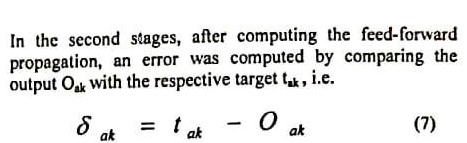

In [250]:
#sigmak = tk - ok

def compute_sigma(Ok,tak): # tak desired result for this output layer node , Ok actual result 
    
    sigmak = []
    
    
    for k in range(no_of_nodes_output_layer):     # for each node in output layer  
        
        
        
        
        sigma = (tak - Ok[k])
        
        sigmak.append(sigma)
        
    return sigmak 



        

### Equation 8,9 - Adjust weights ( output to hidden ) 

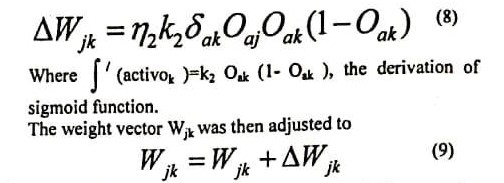

In [251]:
def adjust_weights_hidden_output():
    
    
    
     # equation 8 completion 
    
    weight_diff = [eta2*k2*sigmak[k]*Oj[j]*Ok[k]*(1-Ok[k]) for j in range(no_of_nodes_hidden_layer) for k in range(no_of_nodes_output_layer)]
    
    
    
    #print("Weight diff",weight_diff)
    
    # equation 9 completion
    
    # update each weight using weight difference 
    
    for j in range(no_of_nodes_hidden_layer):
        for k in range(no_of_nodes_output_layer):
            #print("previous",Wjk[j][k])
            Wjk[j][k]+=weight_diff[k]
            #print("updated",Wjk[j][k])
    
    
        
    
    
    



### Equation 10,11 - Adjust threshold ( output layer ) 

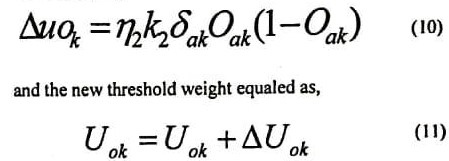

In [252]:
def adjust_thresh_hidden_output():
    
    
    
   
    
    #print(Ok,sigmak)
    
    
    
    thresh_diff = [0]*no_of_nodes_output_layer
    
    
    for k in range(no_of_nodes_output_layer):
        thresh_diff[k] = eta2*k2*sigmak[k]*Ok[k]*(1-Ok[k])  # equation 10 completion 
        Uok[k]+=thresh_diff[k]  # equation 11 completion 
    
    #print("Threshold diff",thresh_diff)
    
    



### Equation 12,13 - Adjust weights ( hidden to input ) 

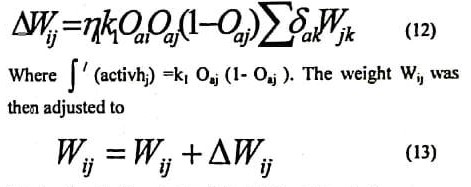

In [253]:
def adjust_weights_input_hidden(row):
    
    
  
    Oi = row[:-1] # all features except the last one ( result )
    
    sops = [] # sum of product for each hidden layer nodes 
    
    # outer loop j, inner loop k , for each hidden layer node, consider all output layer nodes 
    
    for j in range(no_of_nodes_hidden_layer):
        sop = 0.0
        for k in range(no_of_nodes_output_layer):
            sop = sop + (sigmak[k]*Wjk[j][k])
        sops.append(sop)
    
    
    
    for i in range(len(Oi)):
        for j in range(len(Oj)):
            weight_diff = eta1*k1*Oi[i]*Oj[j]*(1-Oj[j])*sops[j] # equation 12
            Wij[i][j] += weight_diff  # equation 13
    
    
            
    






### Equation 14,15 - Adjust threshold ( hidden to input )

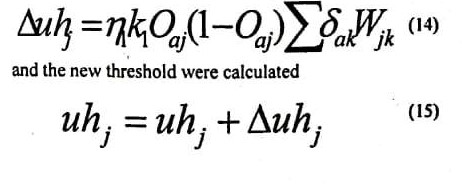

In [254]:
def adjust_thresh_input_hidden():
    
    
    
    
    
    sops = [] # same sum of products for each hidden layer nodes 
    
    for j in range(no_of_nodes_hidden_layer):
        sop = 0.0
        for k in range(no_of_nodes_output_layer):
            sop = sop + (sigmak[k]*Wjk[j][k])
        sops.append(sop)
    
    
    for j in range(len(Oj)):
        thresh_diff = eta1*k1*Oj[j]*(1-Oj[j])*sops[j] # equation 14 
        Uhj[j] += thresh_diff # equation 15
    
    
            
    




## Train and Test

In [255]:
data

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 0],
 [0, 1, 1, 0, 1, 0],
 [0, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 1, 1],
 [1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 1],
 [1, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 1],
 [1, 1, 0, 0, 0, 1],
 [1, 1, 0, 0, 1, 1],
 [1, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 1],
 [1, 1, 1, 0, 0, 1],
 [1, 1, 1, 0, 1, 1],
 [1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1]]

In [256]:
train = []
test = []

In [257]:
train = data[0:len(data)//2 - 1]+data[len(data)//2 + 1:]
test = [data[len(data)//2 - 1]] + [data[len(data)//2]]

In [258]:
train

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 0],
 [0, 1, 1, 0, 1, 0],
 [0, 1, 1, 1, 0, 0],
 [1, 0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 1, 1],
 [1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 1],
 [1, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 1],
 [1, 1, 0, 0, 0, 1],
 [1, 1, 0, 0, 1, 1],
 [1, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 1],
 [1, 1, 1, 0, 0, 1],
 [1, 1, 1, 0, 1, 1],
 [1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1]]

In [259]:
test

[[0, 1, 1, 1, 1, 0], [1, 0, 0, 0, 0, 1]]

In [260]:


Wij,Uhj,Wjk,Uok = initialize_weight_thresh() # intialize all weights and thresholds 




In [261]:
print("no of training samples are, ", len(train))
start_time = time.time() # note starting time 

i=0

while(i<len(train)):
    
    row = train[i] # consider each training pattern 
    
    Oj = compute_output_hidden(row) # output output from hidden to output layer 
    Ok = compute_output_output(Oj) # output of output layer 
    
    sigmak = compute_sigma(Ok,row[-1]) # calculate error 
    
    adjust_weights_hidden_output() # adjust output to hidden layer weigths 
    
    adjust_thresh_hidden_output() # adjust output layer threshold 
    
    adjust_weights_input_hidden(row) # adjust hidden to input layer weights 
    
    adjust_thresh_input_hidden() # adjust hidden layer thesholds 
    
    
    #print("i",i,"desired",row[-1],"actual",np.round(Ok[0])) # show how it is being trained 
    
    if(row[-1]!=np.round(Ok[0])): # matched with the desired ? No ? Start again 
        i=0
        continue
    else:
        i=i+1
        
        
end_time = time.time()
print("training time, ",end_time-start_time," seconds")

no of training samples are,  30
training time,  0.041205406188964844  seconds


In [262]:
cnt=0
for row in test: # for each pattern in test set 
    
    Oj = compute_output_hidden(row) # for each test only compute output from hidden layer
    Ok = compute_output_output(Oj) # final output from output layer 
    
    #print("desired",row[-1],"actual",np.round(Ok[0]))
    if(row[-1]==np.round(Ok[0])): # if matchted, increase count 
        cnt+=1

print("Accuracy ",cnt/len(test)*100.0)

Accuracy  100.0


# Split train test in percentage

In [263]:
def split_predict_compare(train_percent,test_percent):
    
    no_of_train_samples = int(len(data)*train_percent*0.01)
    no_of_test_samples = int(len(data)*test_percent*0.01)
    #print(no_of_train_samples,no_of_test_samples)
    
    train = data[:no_of_train_samples]
    test = data[-no_of_test_samples:]
    
    return train,test

### split in 80-20

In [264]:
train,test = split_predict_compare(80,20)


In [265]:
Wij,Uhj,Wjk,Uok = initialize_weight_thresh() # intialize all weights and thresholds 

In [266]:
print("no of training samples are, ", len(train))
start_time = time.time() # note starting time 

i=0

while(i<len(train)):
    
    row = train[i] # consider each training pattern 
    
    Oj = compute_output_hidden(row) # output output from hidden to output layer 
    Ok = compute_output_output(Oj) # output of output layer 
    
    sigmak = compute_sigma(Ok,row[-1]) # calculate error 
    
    adjust_weights_hidden_output() # adjust output to hidden layer weigths 
    
    adjust_thresh_hidden_output() # adjust output layer threshold 
    
    adjust_weights_input_hidden(row) # adjust hidden to input layer weights 
    
    adjust_thresh_input_hidden() # adjust hidden layer thesholds 
    
    
    #print("i",i,"desired",row[-1],"actual",np.round(Ok[0])) # show how it is being trained 
    
    if(row[-1]!=np.round(Ok[0])): # matched with the desired ? No ? Start again 
        i=0
        continue
    else:
        i=i+1
        
        
end_time = time.time()
print("training time, ",end_time-start_time," seconds")

no of training samples are,  25
training time,  0.04190492630004883  seconds


In [267]:
cnt=0
for row in test: # for each pattern in test set 
    
    Oj = compute_output_hidden(row) # for each test only compute output from hidden layer
    Ok = compute_output_output(Oj) # final output from output layer 
    
    #print("desired",row[-1],"actual",np.round(Ok[0]))
    if(row[-1]==np.round(Ok[0])): # if matchted, increase count 
        cnt+=1

print("Accuracy ",cnt/len(test)*100.0)

Accuracy  83.33333333333334


## split in 60-40

In [268]:
train,test = split_predict_compare(60,40)

In [269]:
Wij,Uhj,Wjk,Uok = initialize_weight_thresh() # intialize all weights and thresholds 

In [270]:
print("no of training samples are, ", len(train))
start_time = time.time() # note starting time 

i=0

while(i<len(train)):
    
    row = train[i] # consider each training pattern 
    
    Oj = compute_output_hidden(row) # output output from hidden to output layer 
    Ok = compute_output_output(Oj) # output of output layer 
    
    sigmak = compute_sigma(Ok,row[-1]) # calculate error 
    
    adjust_weights_hidden_output() # adjust output to hidden layer weigths 
    
    adjust_thresh_hidden_output() # adjust output layer threshold 
    
    adjust_weights_input_hidden(row) # adjust hidden to input layer weights 
    
    adjust_thresh_input_hidden() # adjust hidden layer thesholds 
    
    
    #print("i",i,"desired",row[-1],"actual",np.round(Ok[0])) # show how it is being trained 
    
    if(row[-1]!=np.round(Ok[0])): # matched with the desired ? No ? Start again 
        i=0
        continue
    else:
        i=i+1
        
        
end_time = time.time()
print("training time, ",end_time-start_time," seconds")

no of training samples are,  19
training time,  0.030196189880371094  seconds


In [271]:
cnt=0
for row in test: # for each pattern in test set 
    
    Oj = compute_output_hidden(row) # for each test only compute output from hidden layer
    Ok = compute_output_output(Oj) # final output from output layer 
    
    #print("desired",row[-1],"actual",np.round(Ok[0]))
    if(row[-1]==np.round(Ok[0])): # if matchted, increase count 
        cnt+=1

print("Accuracy ",cnt/len(test)*100.0)

Accuracy  16.666666666666664
